In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import datasets
from sklearn.cluster import KMeans

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/Adelaaas/Data_science_basic_22-23_2/main/home_work_clustering/segmentation%20data.csv')
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


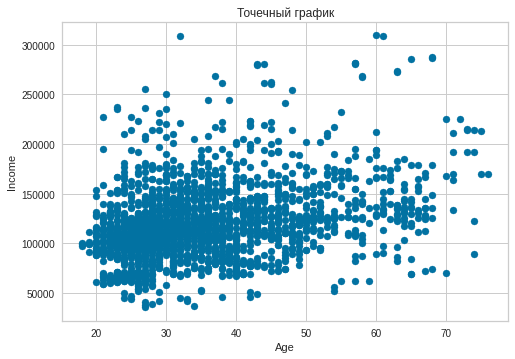

In [24]:
plt.scatter(df['Age'], df['Income'])
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Точечный график")
plt.show()

#Больше всего людей с доходом от 75000 до 150000 и возрастом от 20 до 45

Text(0.5, 1.0, 'Анализ пустых значений')

<Figure size 1080x432 with 0 Axes>

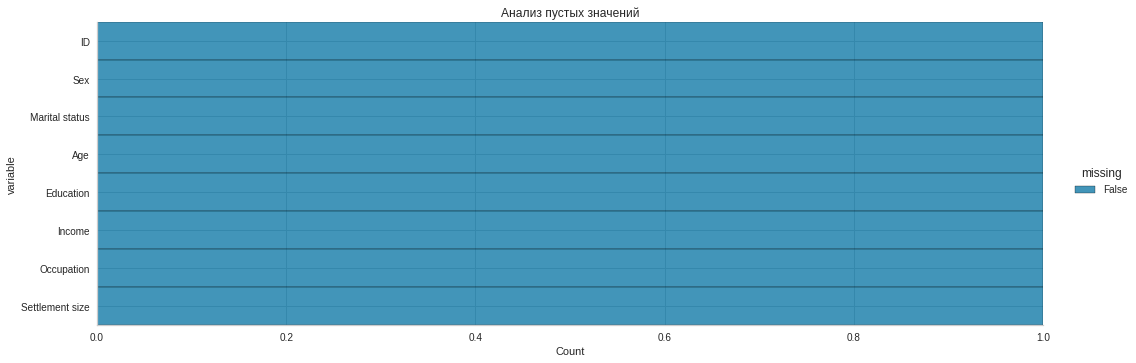

In [28]:

plt.figure(figsize=(15,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=3
)
plt.title("Анализ пустых значений")

#Пустых значений нет

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


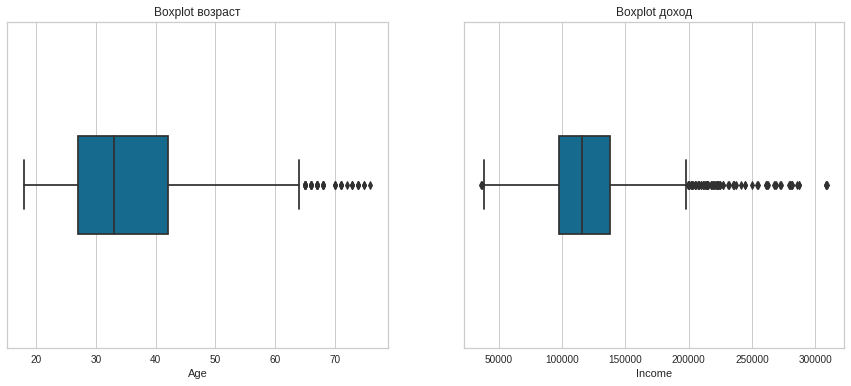

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))  

sns.boxplot(df['Age'], ax=axes[0], width=0.3)
sns.boxplot(df['Income'], ax=axes[1], width=0.3)

axes[0].set_title("Boxplot возраст")
axes[1].set_title("Boxplot доход")

plt.show()

# Присутствуют выбивающиеся группы (пожилые старше 64 лет; люди с доходом выше 200 000; люди с доходом ниже 30 000)

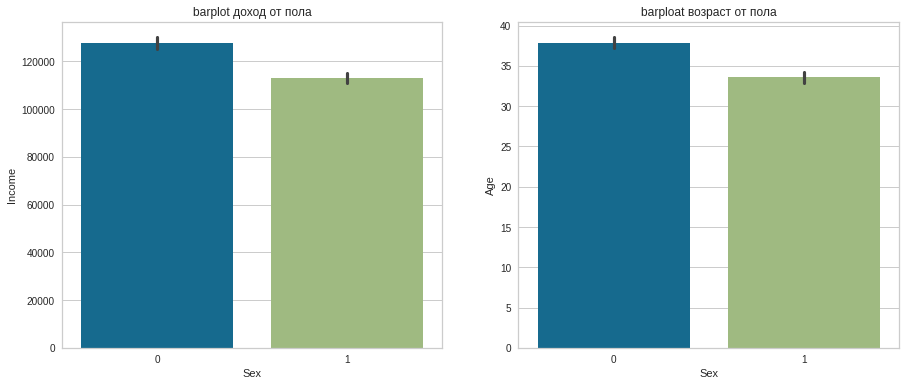

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))
sns.barplot(data=df, ax=axes[0], x="Sex", y="Income")
sns.barplot(data=df, ax=axes[1], x="Sex", y="Age")

axes[0].set_title("barplot доход от пола")
axes[1].set_title("barploat возраст от пола")

plt.show()

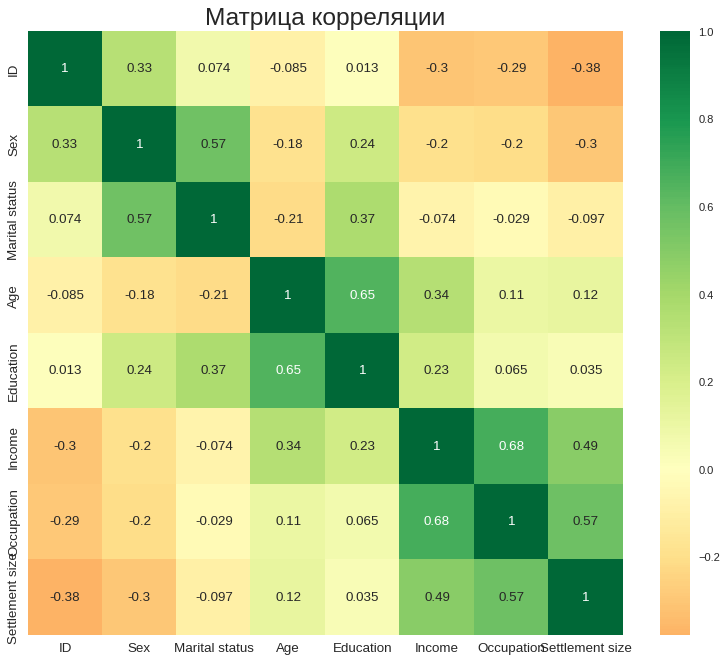

In [32]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Матрица корреляции', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

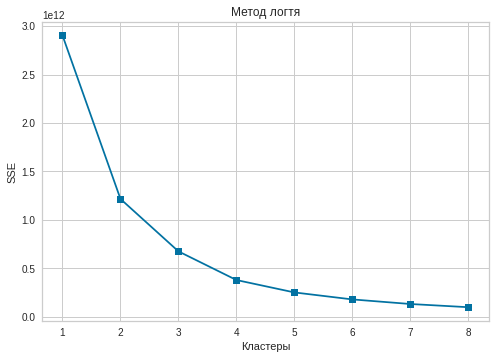

In [38]:
SSE = []

for k in range(1,9):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)
 
plt.plot(range(1,9), SSE, marker='s');
plt.xlabel('Кластеры')
plt.title("Метод логтя")
plt.ylabel('SSE');
plt.show()

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fe966472d60>,
                     colors='yellowbrick',
                     estimator=KMeans(max_iter=100, n_clusters=3,
                                      random_state=42))

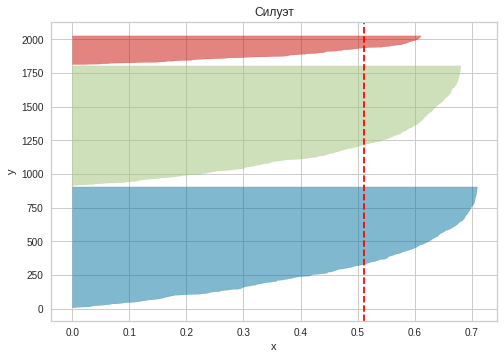

In [39]:
fig, axes = plt.subplots()

km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=42)
 
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Силуэт")
visualizer.fit(df)

# Оптимальное количество кластеров - 3

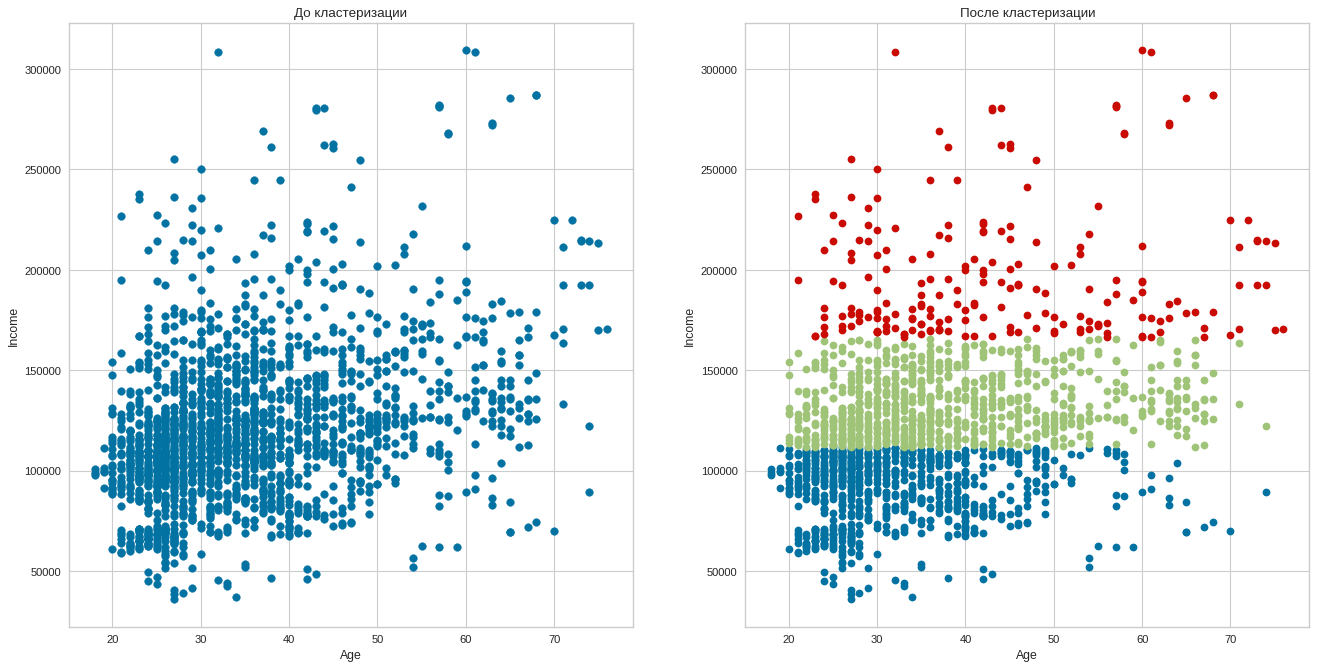

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10), dpi=80)
axes[0].scatter(df['Age'], df['Income'])
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Income")
axes[0].set_title("До кластеризации")

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
Y_pred = kmeans.labels_
df['cluster'] = Y_pred

axes[1].plot(df[df['cluster']==0]['Age'], df[df['cluster']==0]['Income'], 'bo', label='class1')
axes[1].plot(df[df['cluster']==1]['Age'], df[df['cluster']==1]['Income'], 'go', label='class2')
axes[1].plot(df[df['cluster']==2]['Age'], df[df['cluster']==2]['Income'], 'ro', label='class3')
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Income")
axes[1].set_title("После кластеризации")

plt.show()
# Разделение на кластеры было сделано по доходу, а не возрасту

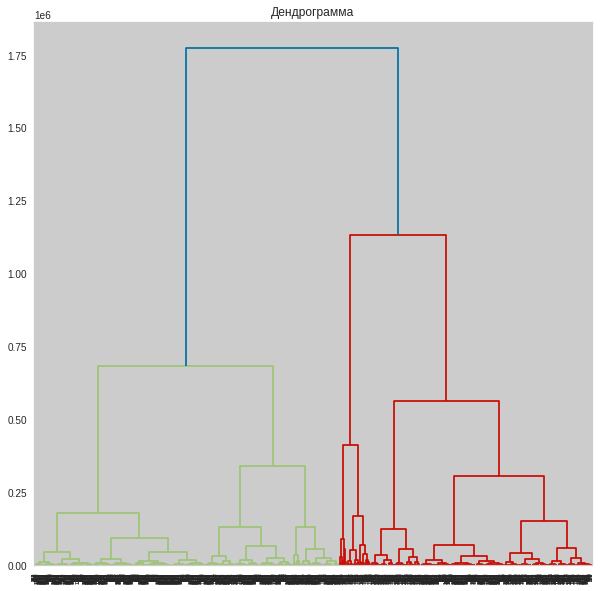

In [65]:
Z = linkage(df, 'ward')
fig = plt.figure(figsize=(10, 10))
dn = dendrogram(Z)

plt.title("Дендрограмма")

plt.show()